# K Neighbors Classifier
Neste notebook usamos o classificador K Neighbors (K-vizinhos mais próximos) para determinar de acordo com as características do anúncio do carro se a coluna 'price' (preço) está em uma das seguintes faixas de preço:
- very low price
- low price
- average low price
- average price
- average high price
- high price
- very high price

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from Utils import run_classifier_and_track

KNEIGHBORS_CLASSIFIER_EXPERIMENT = "KNeighborsClassifier"

In [22]:
##Preparação do Dataframe

train = pd.read_csv('../datasets/classifier/train_classifier_vehicles.csv')
test = pd.read_csv('../datasets/classifier/test_classifier_vehicles.csv')
valid = pd.read_csv('../datasets/classifier/validation_classifier_vehicles.csv')

def set_categories(df, categories):
    df[categories] = df[categories].astype('category')

def set_codes(df, categories):    
    for category in categories:
        df[category] = df[category].cat.codes
    return df

categories = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state','pricecategory']
categories2 = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state']

set_categories(train, categories)
train['pricecode'] = train.pricecategory.cat.codes
set_codes(train, categories2)

set_categories(test, categories)
test['pricecode'] = test.pricecategory.cat.codes
set_codes(test, categories2)

set_categories(valid, categories)
valid['pricecode'] = valid.pricecategory.cat.codes
set_codes(valid, categories2)

,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,state,pricecategory,pricecode
0,2013,7,2,87951,0,1,2,10,9,average low price,1
1,2014,7,2,118963,0,0,2,9,4,average high price,0
2,2006,8,2,110000,0,0,2,8,38,average price,2
3,2012,23,2,97211,0,0,0,0,1,average high price,0
4,2016,20,2,55493,0,0,0,0,30,high price,3
...,...,...,...,...,...,...,...,...,...,...,...
59341,2014,13,2,34500,0,0,2,2,48,high price,3
59342,2012,34,0,152270,0,0,3,7,2,high price,3
59343,2010,18,2,103378,0,0,2,8,1,average low price,1
59344,2015,20,2,67335,0,2,3,10,4,average high price,0


In [23]:
##Divisão de entre treino e teste
x_train = train.drop(['pricecategory'],axis = 1)
y_train = train.pricecode

x_test = test.drop(['pricecategory'],axis = 1)
y_test = test.pricecode

In [6]:
params = {'n_neighbors': 5}
model = KNeighborsClassifier(n_neighbors=params['n_neighbors'])
run_classifier_and_track(x_train, 
                         'train_classifier_vehicles.csv',
                         x_test, 
                         'test_classifier_vehicles.csv',
                         model, 
                         KNEIGHBORS_CLASSIFIER_EXPERIMENT, 
                         'pricecode', 
                         'KNeighborsClassifier',
                         params)

train_Accuracy: 0.5906

test_Accuracy: 0.4068



In [25]:
x_train = x_train.drop(columns=['pricecode'])
x_test = x_test.drop(columns=['pricecode'])

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
score = knn.score(x_test, y_test)
print("Model Score: " + str(score))

y_model = knn.predict(x_test)
ypred_train = knn.predict(x_train)

print("ACC TRAINING:" + str(accuracy_score(y_train, ypred_train)))
print("ACC TEST:" + str(accuracy_score(y_test, y_model)))

Model Score: 0.4067914418228462
ACC TRAINING:0.5906267201383975
ACC TEST:0.4067914418228462


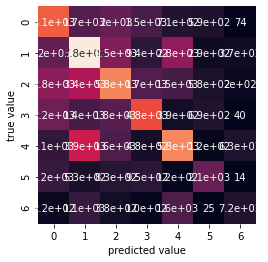

In [26]:
y_model = model.predict(x_test)
ypred_train = model.predict(x_train)
mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, )
plt.xlabel('predicted value')
plt.ylabel('true value');